# Visualization of Linguistic Graphs with *discoursegraphs*

- each format that can be parsed by discoursegraphs (RST, MMAX2, TigerXML, Conano ...)
  is converted into a networkx multidigraph
- networkx graphs can be converted into dot/graphviz format for visulization

## *WARNING*: dot/graphviz doesn't sort nodes
- we would have to add additional (invisible) edges between the token nodes to make them appear in the right order
- the token order can be extracted from the ``.tokens`` list of a DiscourseDocumentGraph (or any of its subclasses)

In [1]:
%matplotlib inline

# install the gvmagic extension by uncommenting/running it once: 
# %install_ext https://raw.github.com/cjdrake/ipython-magic/master/gvmagic.py

%load_ext gvmagic

import os
import discoursegraphs as dg

In [2]:
CORPUS_DIR = os.path.expanduser('~/corpora/potsdam-commentary-corpus-2.0.0/')

In [3]:
rstgraph = dg.read_rs3(os.path.join(CORPUS_DIR, 'rst', 'maz-1423.rs3'))
rstgraph_untokenized = dg.read_rs3(os.path.join(CORPUS_DIR, 'rst', 'maz-1423.rs3'), tokenize=False)

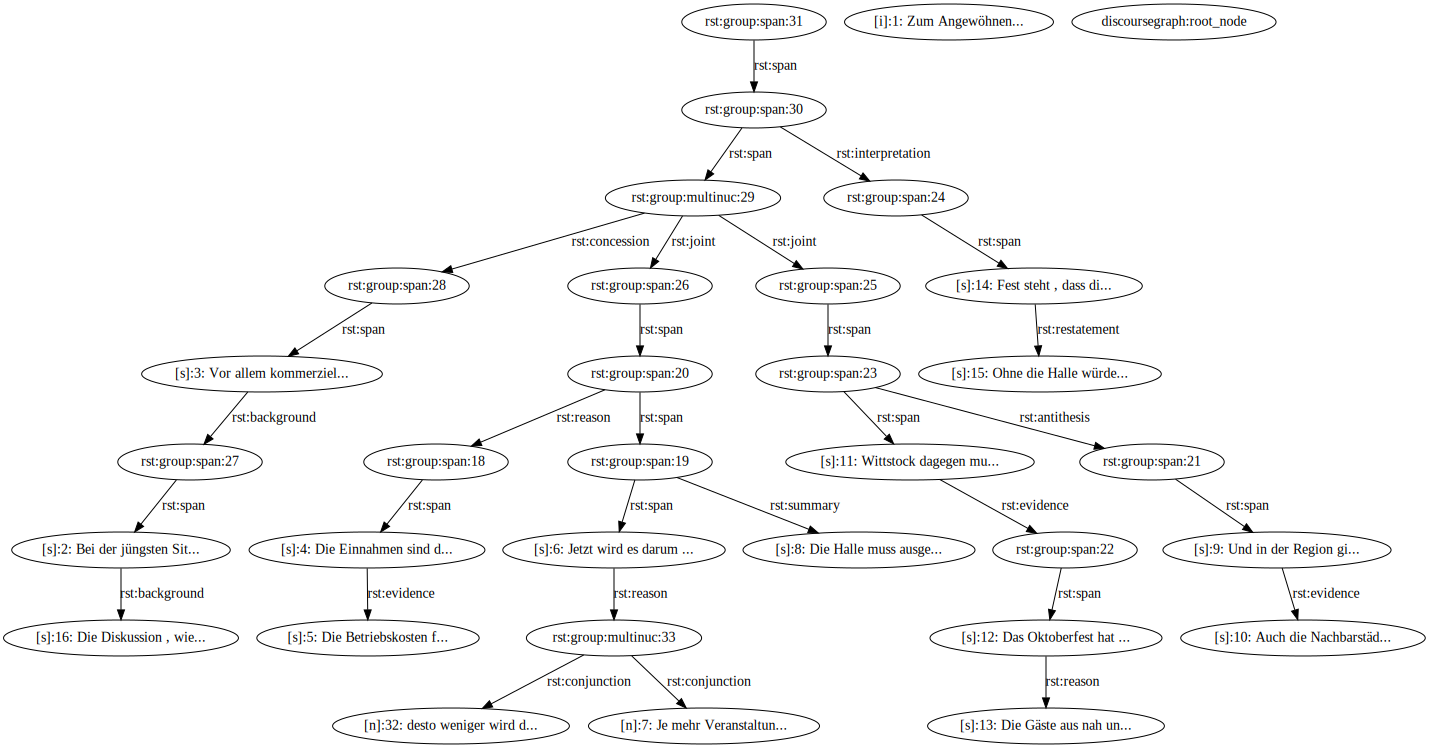

In [4]:
%dotstr dg.print_dot(rstgraph_untokenized)

# Let's look at some statistics about the created document graph

In [5]:
dg.info(rstgraph_untokenized)

Name: maz-1423.rs3
Type: RSTGraph
Number of nodes: 33
Number of edges: 30
Average in degree:   0.9091
Average out degree:   0.9091 

Node statistics

number of nodes with layers
	rst - 31
	rst:segment - 17
	rst:group - 14
	rst:root - 1
	discoursegraph - 1

number of nodes with attributes
	layers - 33
	rst:segment_type - 32
	label - 32
	rst:rel_name - 23
	rst:text - 17
	rst:group_type - 15
	metadata - 2

Edge statistics

number of edges with layers
	rst - 30

number of edges with attributes
	layers - 30
	rst:rel_type - 30
	edge_type - 30
	rst:rel_name - 30
	label - 30

most common source edges
	rst:29 - 3
	rst:30 - 2
	rst:33 - 2
	rst:19 - 2
	rst:23 - 2

most common target edges
	rst:30 - 1
	rst:32 - 1
	rst:33 - 1
	rst:12 - 1
	rst:13 - 1


# We can also plot attribute value statistics (e.g. POS distributions, RST relation counts) 

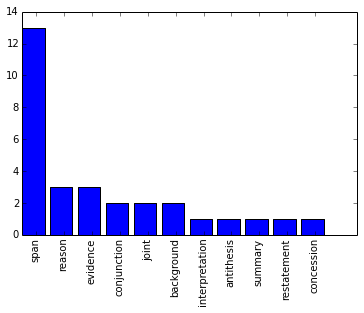

In [17]:
dg.util.plot_attribute_distribution(rstgraph, rstgraph.edges(), 'rst:rel_name')

In [9]:
cdg = dg.read_conano(os.path.join(CORPUS_DIR, 'connectors', 'maz-1423.xml'))
cdg_untokenized = dg.read_conano(os.path.join(CORPUS_DIR, 'connectors', 'maz-1423.xml'), tokenize=False)

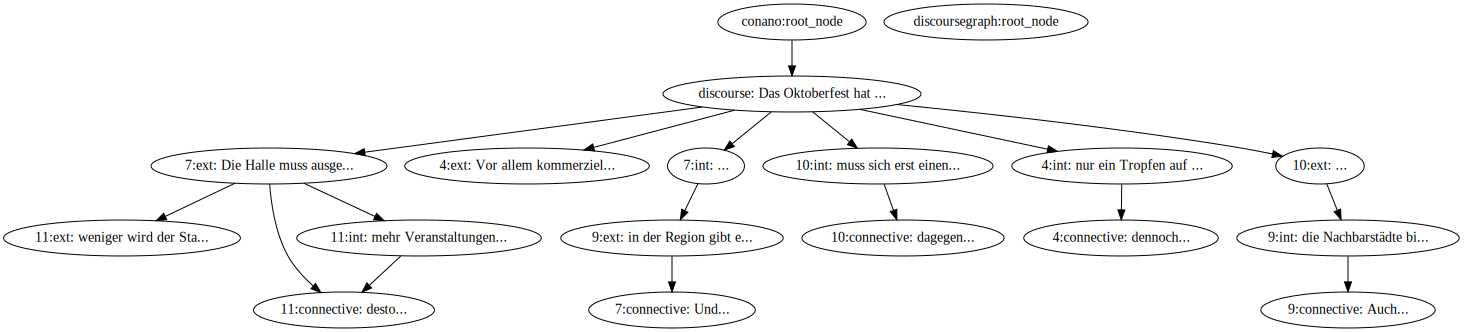

In [10]:
%dotstr dg.print_dot(cdg_untokenized)

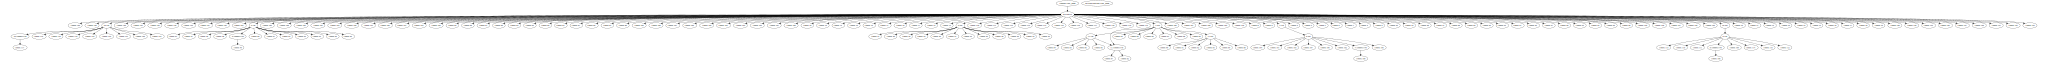

In [11]:
%dotstr dg.print_dot(cdg)

In [12]:
mdg = dg.read_mmax2(os.path.join(CORPUS_DIR, 'coreference', 'maz-1423.mmax'))

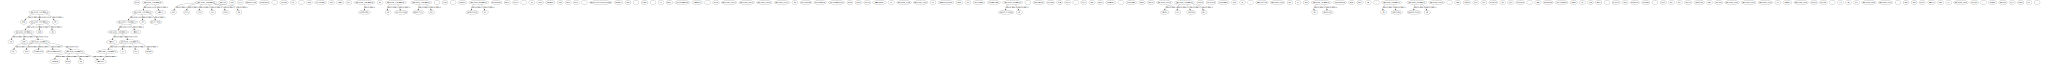

In [13]:
%dotstr dg.print_dot(mdg)

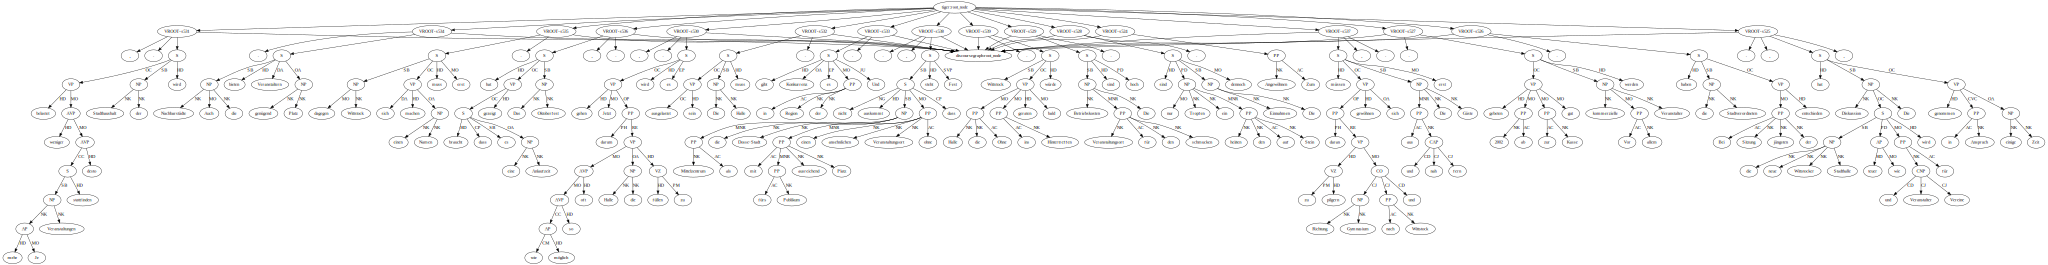

In [14]:
tdg = dg.read_tiger(os.path.join(CORPUS_DIR, 'syntax', 'maz-1423.xml'))
%dotstr dg.print_dot(tdg)

# Let's merge all these graphs to make them visually more appealing!1!!

- we can only merge tokenized graphs (with identical tokenization)

## Warning: original graphs are manipulated while merging

- if a graph is merged into an existing graphs, its node IDs will be changed
  to match those of the existing graph

In [15]:
merged_graph = dg.DiscourseDocumentGraph()
merged_graph.merge_graphs(rstgraph)
merged_graph.merge_graphs(cdg)
merged_graph.merge_graphs(mdg)
merged_graph.merge_graphs(tdg)

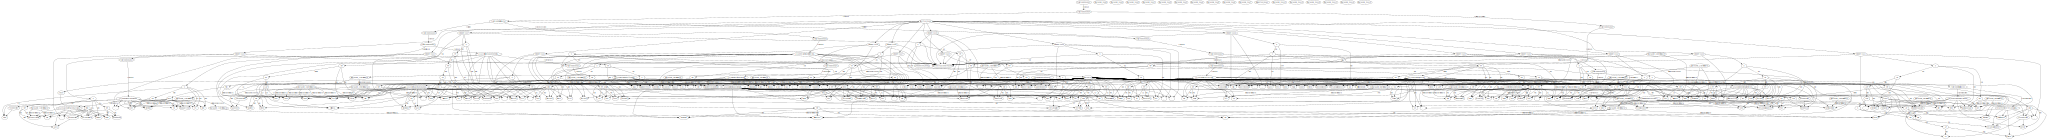

In [16]:
%dotstr dg.print_dot(merged_graph)

Beautiful, isn't it?